In [771]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [772]:
# import sys
# !{sys.executable} -m pip install plotly

In [773]:
from top_tracks import results, track_analysis
df = pd.DataFrame.from_dict(track_analysis)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.723,0.745,8,-4.584,0,0.1450,0.010000,0.000000,0.0749,0.478,98.001,audio_features,1KA12CcrewBMjcMBq07SI7,spotify:track:1KA12CcrewBMjcMBq07SI7,https://api.spotify.com/v1/tracks/1KA12CcrewBM...,https://api.spotify.com/v1/audio-analysis/1KA1...,262040,4
1,0.463,0.766,1,-3.653,1,0.2030,0.004480,0.660000,0.5500,0.359,158.167,audio_features,2mlh8fBK1wFPW5PgHYCjbN,spotify:track:2mlh8fBK1wFPW5PgHYCjbN,https://api.spotify.com/v1/tracks/2mlh8fBK1wFP...,https://api.spotify.com/v1/audio-analysis/2mlh...,113000,4
2,0.400,0.745,7,-11.085,1,0.0539,0.000004,0.023200,0.2160,0.224,130.789,audio_features,5PQobJZwHbbUWL4qzGbBV0,spotify:track:5PQobJZwHbbUWL4qzGbBV0,https://api.spotify.com/v1/tracks/5PQobJZwHbbU...,https://api.spotify.com/v1/audio-analysis/5PQo...,375333,4
3,0.452,0.937,1,-3.346,0,0.1610,0.000209,0.000004,0.6060,0.604,164.032,audio_features,6sIbv1oWOuma2qV907MUbk,spotify:track:6sIbv1oWOuma2qV907MUbk,https://api.spotify.com/v1/tracks/6sIbv1oWOuma...,https://api.spotify.com/v1/audio-analysis/6sIb...,209598,4
4,0.382,0.811,11,-6.191,0,0.0361,0.024000,0.000001,0.2610,0.733,179.149,audio_features,0AiUx0SP4HK1DJPwi20cEn,spotify:track:0AiUx0SP4HK1DJPwi20cEn,https://api.spotify.com/v1/tracks/0AiUx0SP4HK1...,https://api.spotify.com/v1/audio-analysis/0AiU...,201760,4


In [863]:
attributes = df[["danceability", "energy", "acousticness", "valence", "mode", "key", "loudness"]]
tracks = pd.DataFrame.from_records(pd.DataFrame.from_records(results)["items"])

In [864]:
tracks = tracks[["name", "href", "id", "uri"]]
tracks["uri"] = tracks["uri"].apply(lambda s: s.split(":")[2])

In [868]:
attributes['name'] = tracks['name']
attributes.head()

<ipython-input-868-74744711e69d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,danceability,energy,acousticness,valence,mode,key,loudness,name
0,0.723,0.745,0.010000,0.478,0,8,-4.584,Bloques
1,0.463,0.766,0.004480,0.359,1,1,-3.653,Flat Earth
2,0.400,0.745,0.000004,0.224,1,7,-11.085,Bleed Me an Ocean
3,0.452,0.937,0.000209,0.604,0,1,-3.346,1x1 (feat. Nova Twins)
4,0.382,0.811,0.024000,0.733,0,11,-6.191,Little Dreamer - 2015 Remaster


In [777]:
attributes.mean()

danceability    0.462840
energy          0.827940
acousticness    0.074993
valence         0.361114
mode            0.680000
key             4.980000
loudness       -5.878440
dtype: float64

In [779]:
from sklearn.preprocessing import StandardScaler

In [780]:
scaler = StandardScaler()

In [781]:
scaler.fit(attributes)

StandardScaler()

In [782]:
transform = scaler.transform(attributes)

In [783]:
norm_df = pd.DataFrame.from_records(transform)

In [879]:
attributes.head()

,danceability,energy,acousticness,valence,mode,key,loudness,name
0,0.723,0.745,0.010000,0.478,0,8,-4.584,Bloques
1,0.463,0.766,0.004480,0.359,1,1,-3.653,Flat Earth
2,0.400,0.745,0.000004,0.224,1,7,-11.085,Bleed Me an Ocean
3,0.452,0.937,0.000209,0.604,0,1,-3.346,1x1 (feat. Nova Twins)
4,0.382,0.811,0.024000,0.733,0,11,-6.191,Little Dreamer - 2015 Remaster


In [784]:
norm_df.head()

,0,1,2,3,4,5,6
0,1.492126,-0.466392,-0.336837,0.531989,-1.457738,0.838255,0.416471
1,0.000918,-0.348304,-0.365445,-0.009622,0.685994,-1.104721,0.716010
2,-0.360414,-0.466392,-0.388641,-0.624054,0.685994,0.560687,-1.675151
3,-0.062172,0.613272,-0.387580,1.105460,-1.457738,-1.104721,0.814784
4,-0.463651,-0.095258,-0.264280,1.692584,-1.457738,1.670959,-0.100563


In [785]:
import plotly.express as px

In [900]:
fig = go.Figure()

for num in range(0, 5):
    fig.add_trace(go.Scatterpolar(
          r=norm_df.iloc[num].values,
          theta=attributes.columns,
          fill='toself',
          name=attributes.iloc[num]["name"]
    ))
    
    
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-3.5, 3.5]
    )),
  showlegend=True
)

fig.show()

In [789]:
temp = norm_df[[1, 2, 3]]

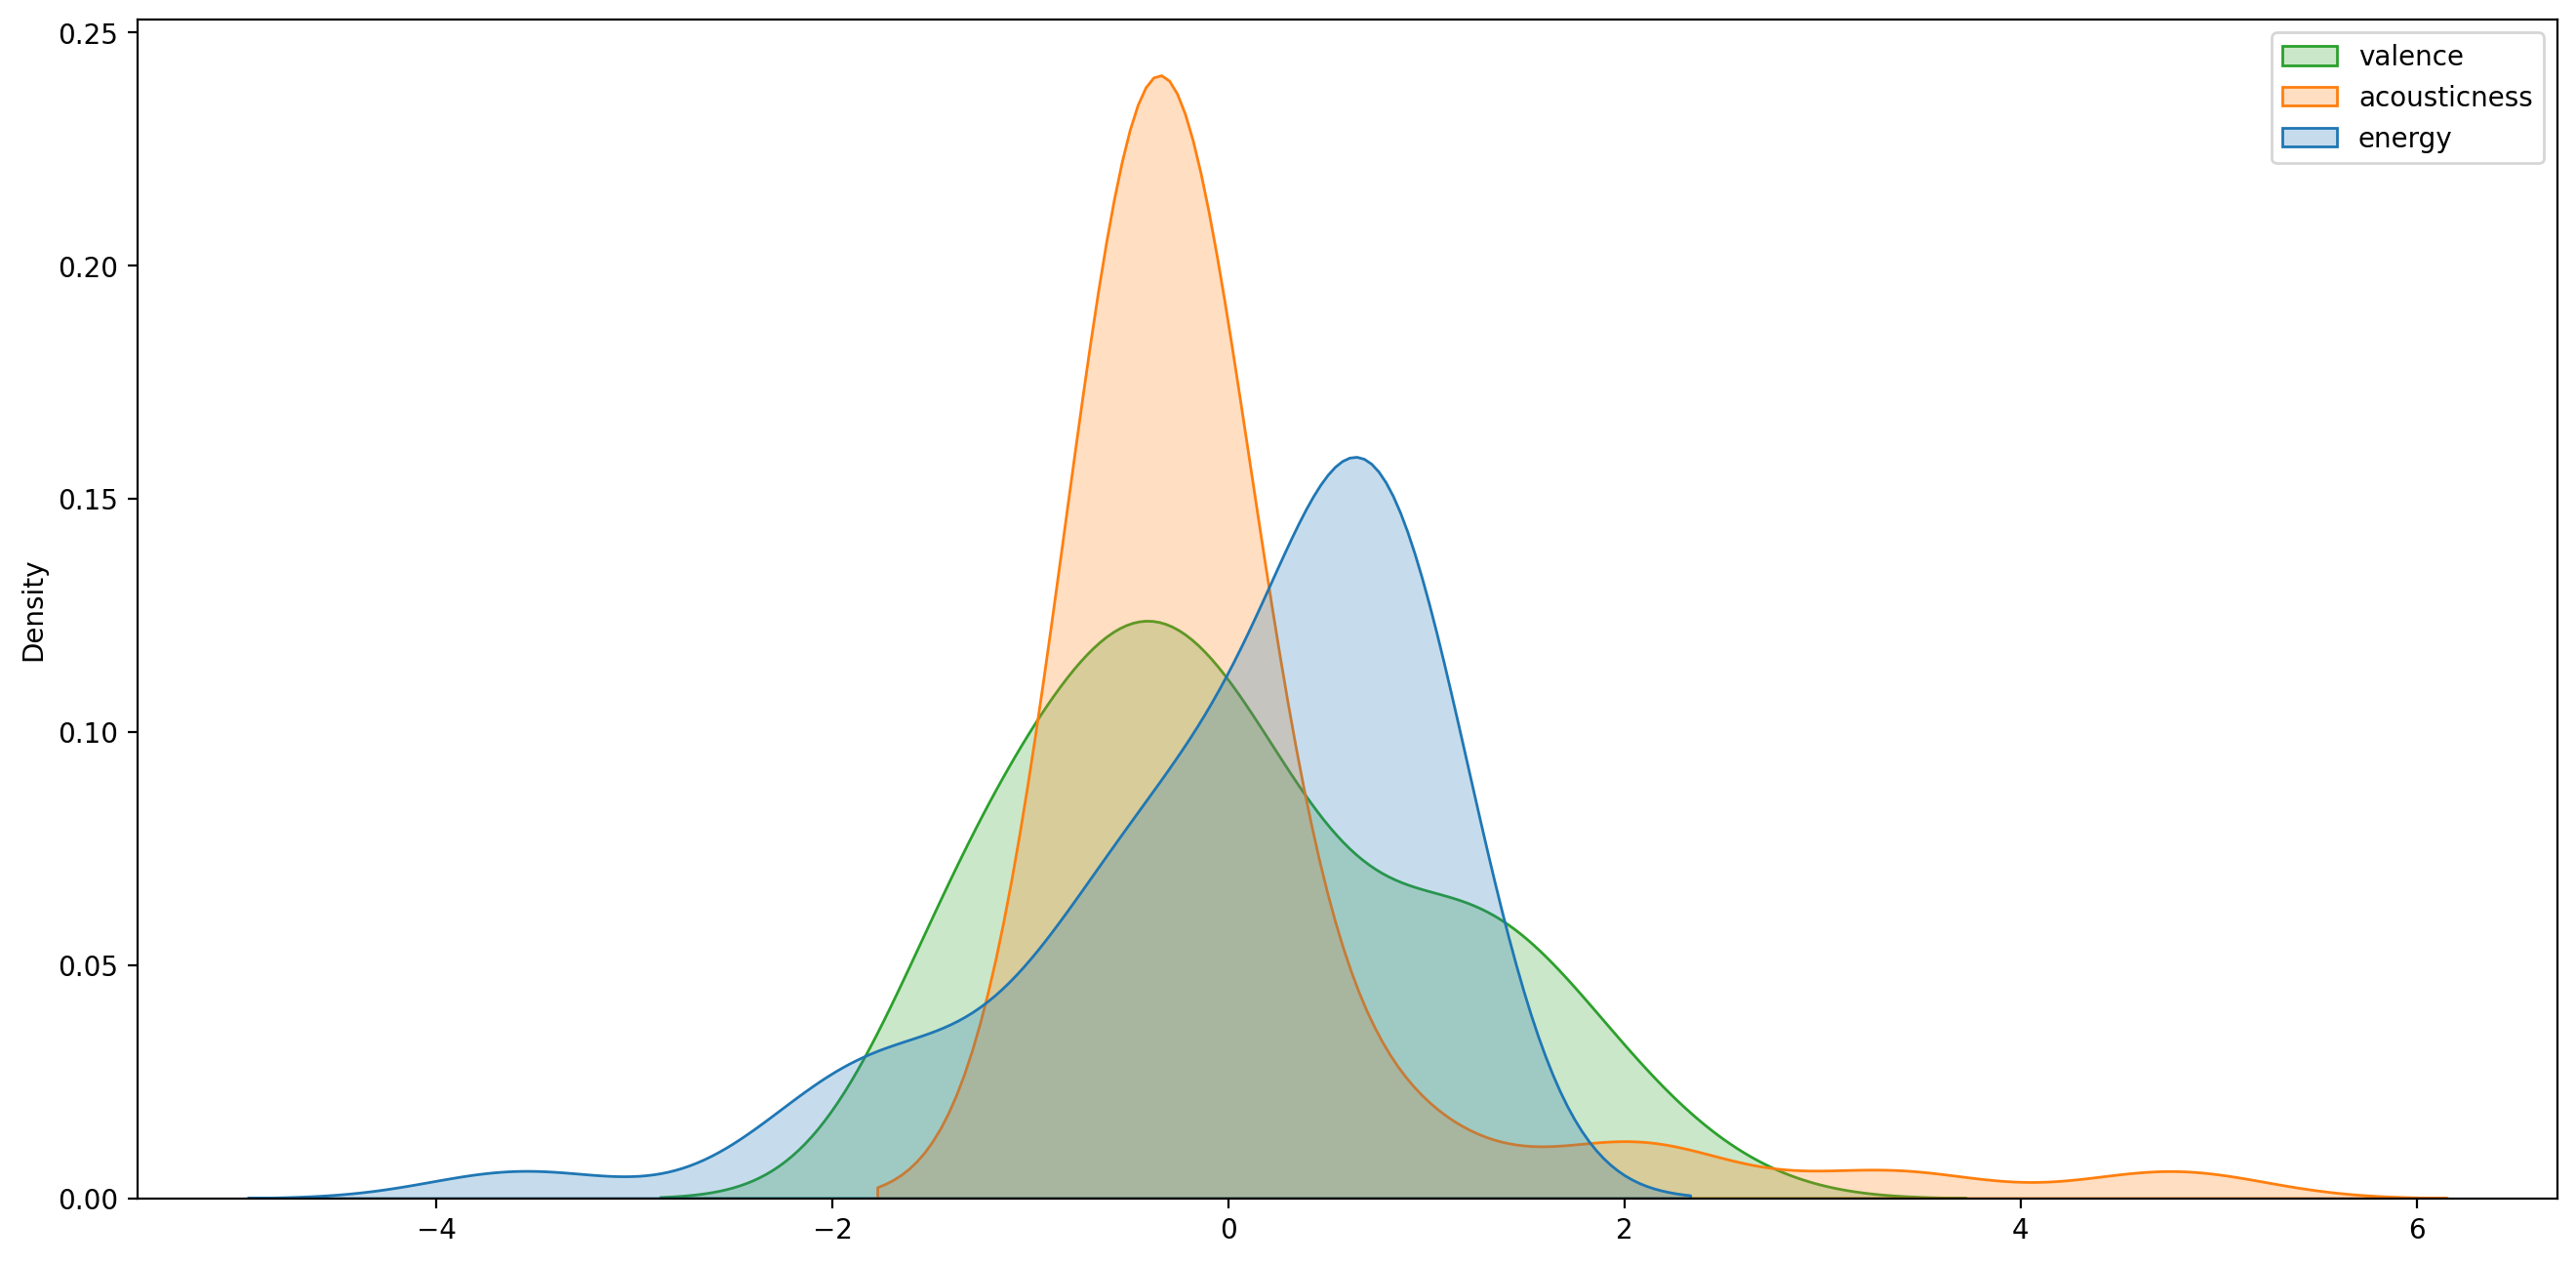

In [790]:
plt.figure(figsize=(16, 8), dpi=200)
kdeplot = sns.kdeplot(data=temp, shade=True)
plt.legend(["valence", "acousticness", "energy"])

plt.show();

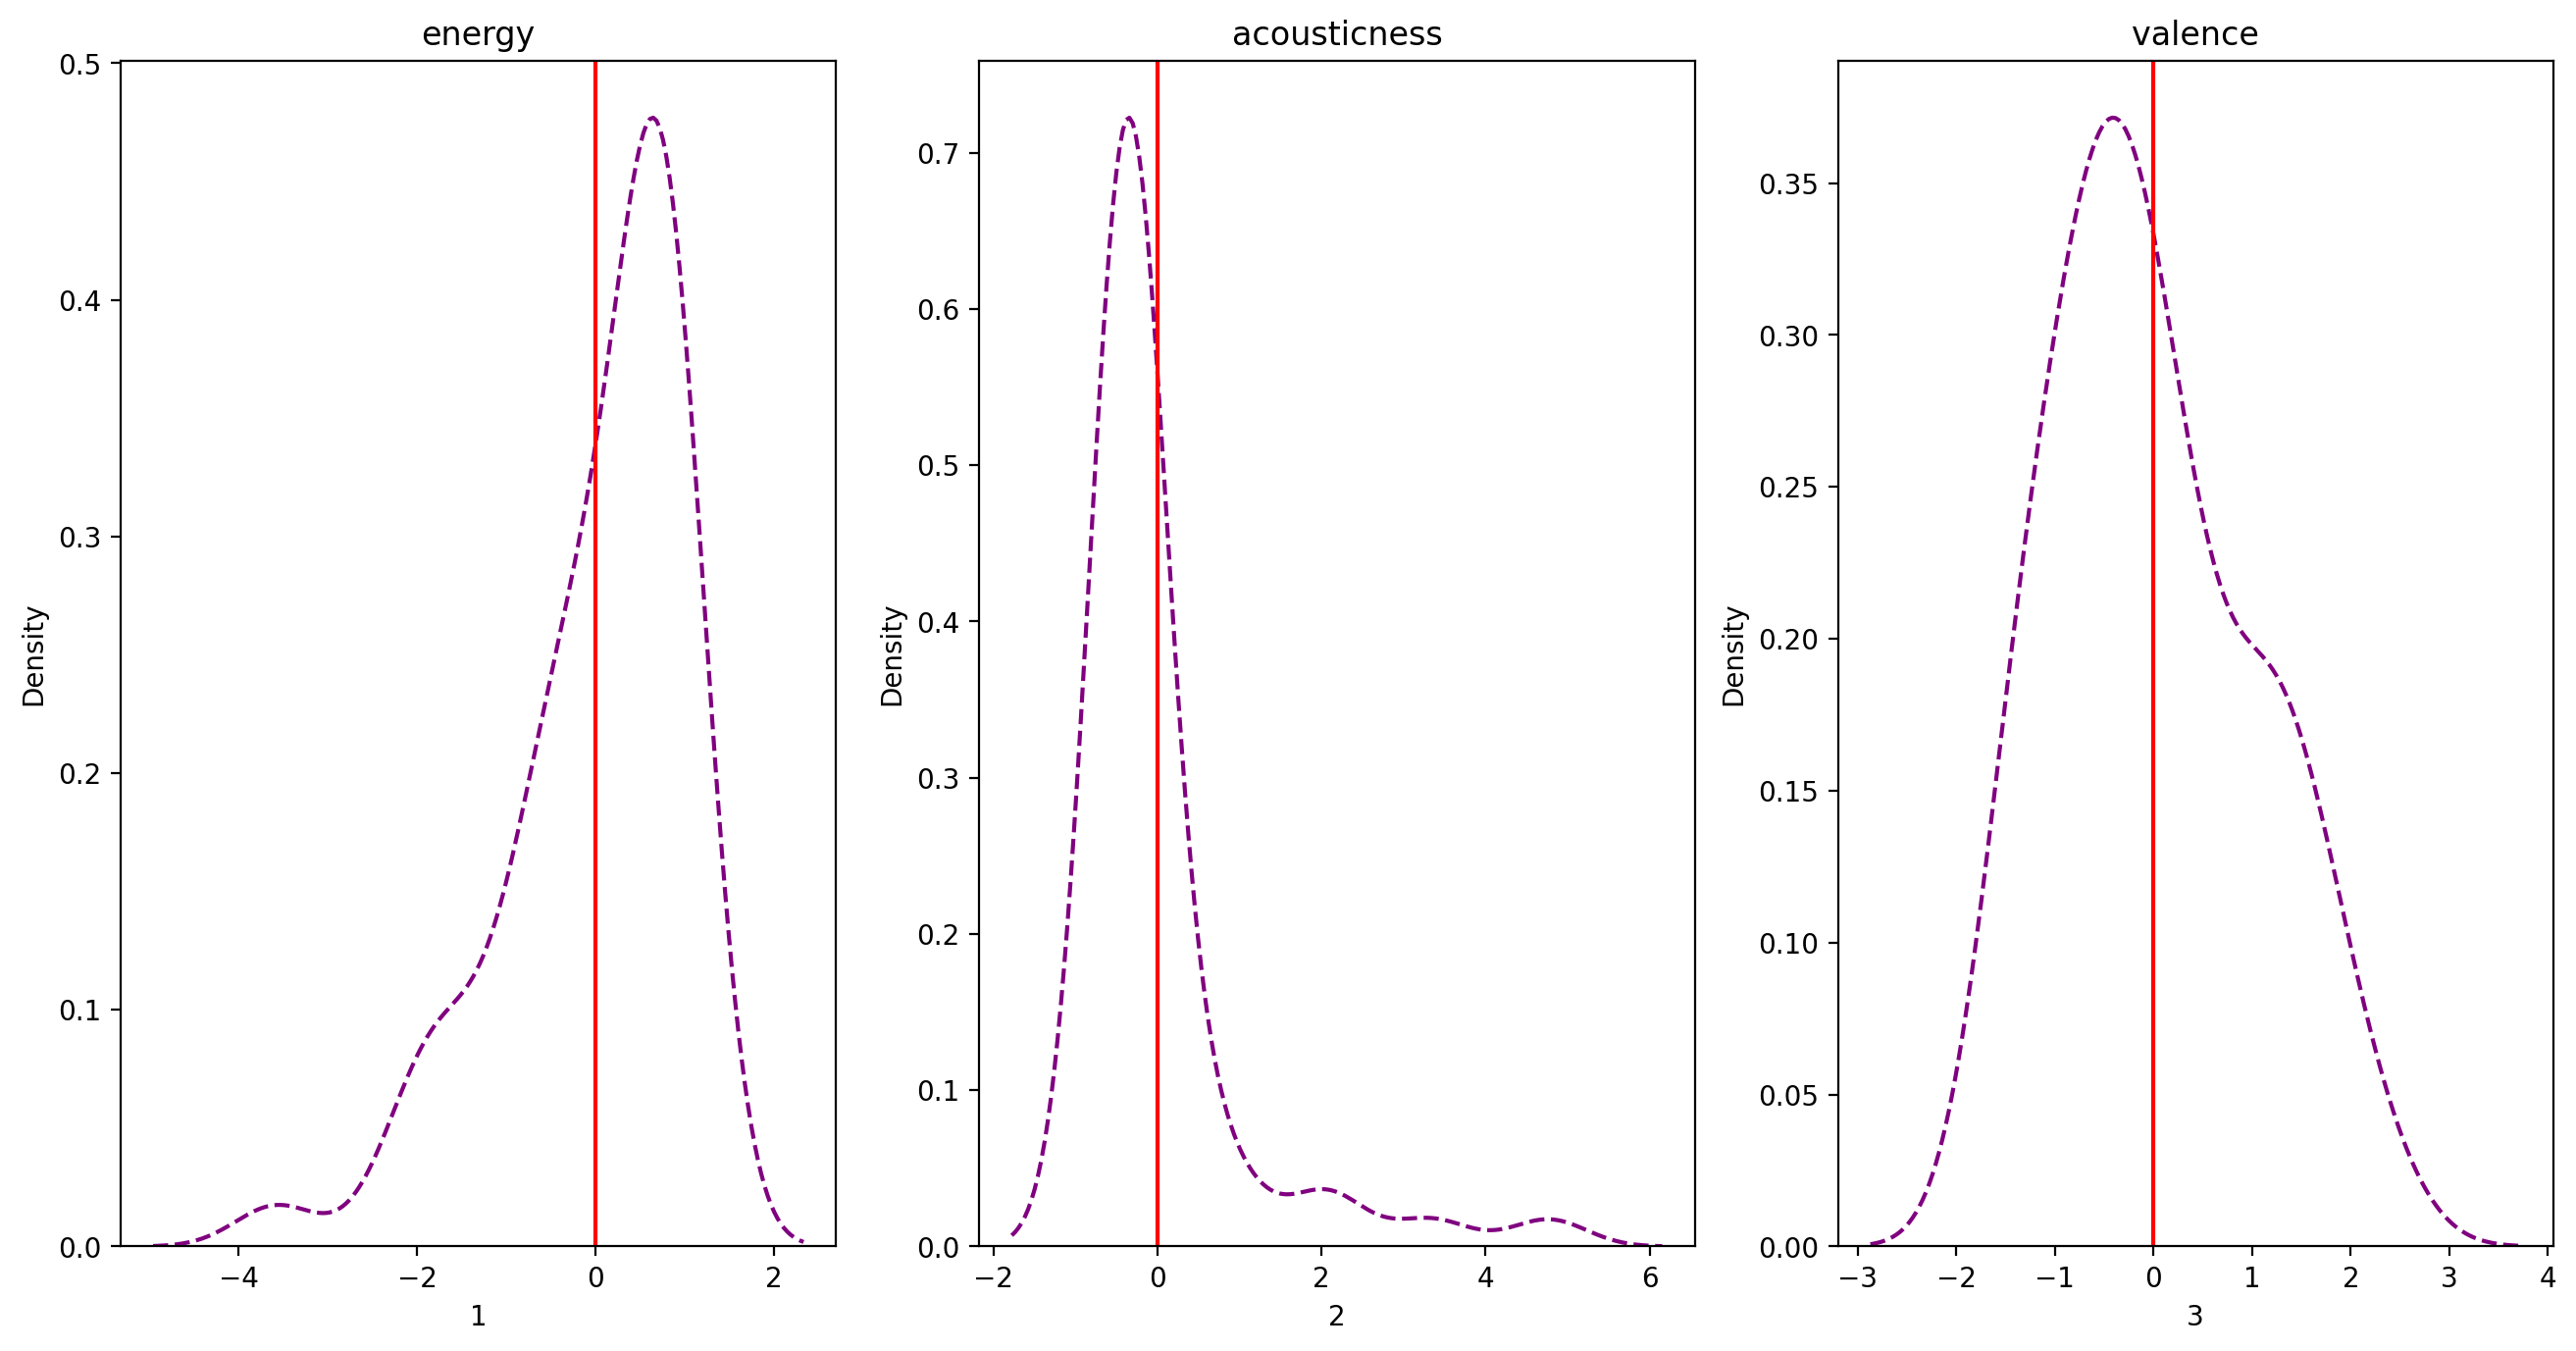

In [791]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), dpi=200)

for num in range(1, 4):
    sns.kdeplot(x=temp[num], data=temp, c='purple', ls='--', ax=ax[num - 1])
    ax[num - 1].set_title(attributes.columns[num])
    ax[num - 1].axvline(x=temp[num].mean(), c='red')

In [792]:
tracks.head()

,name,href,id,uri,mode
0,Bloques,https://api.spotify.com/v1/tracks/1KA12CcrewBM...,1KA12CcrewBMjcMBq07SI7,1KA12CcrewBMjcMBq07SI7,0
1,Flat Earth,https://api.spotify.com/v1/tracks/2mlh8fBK1wFP...,2mlh8fBK1wFPW5PgHYCjbN,2mlh8fBK1wFPW5PgHYCjbN,1
2,Bleed Me an Ocean,https://api.spotify.com/v1/tracks/5PQobJZwHbbU...,5PQobJZwHbbUWL4qzGbBV0,5PQobJZwHbbUWL4qzGbBV0,1
3,1x1 (feat. Nova Twins),https://api.spotify.com/v1/tracks/6sIbv1oWOuma...,6sIbv1oWOuma2qV907MUbk,6sIbv1oWOuma2qV907MUbk,0
4,Little Dreamer - 2015 Remaster,https://api.spotify.com/v1/tracks/0AiUx0SP4HK1...,0AiUx0SP4HK1DJPwi20cEn,0AiUx0SP4HK1DJPwi20cEn,0


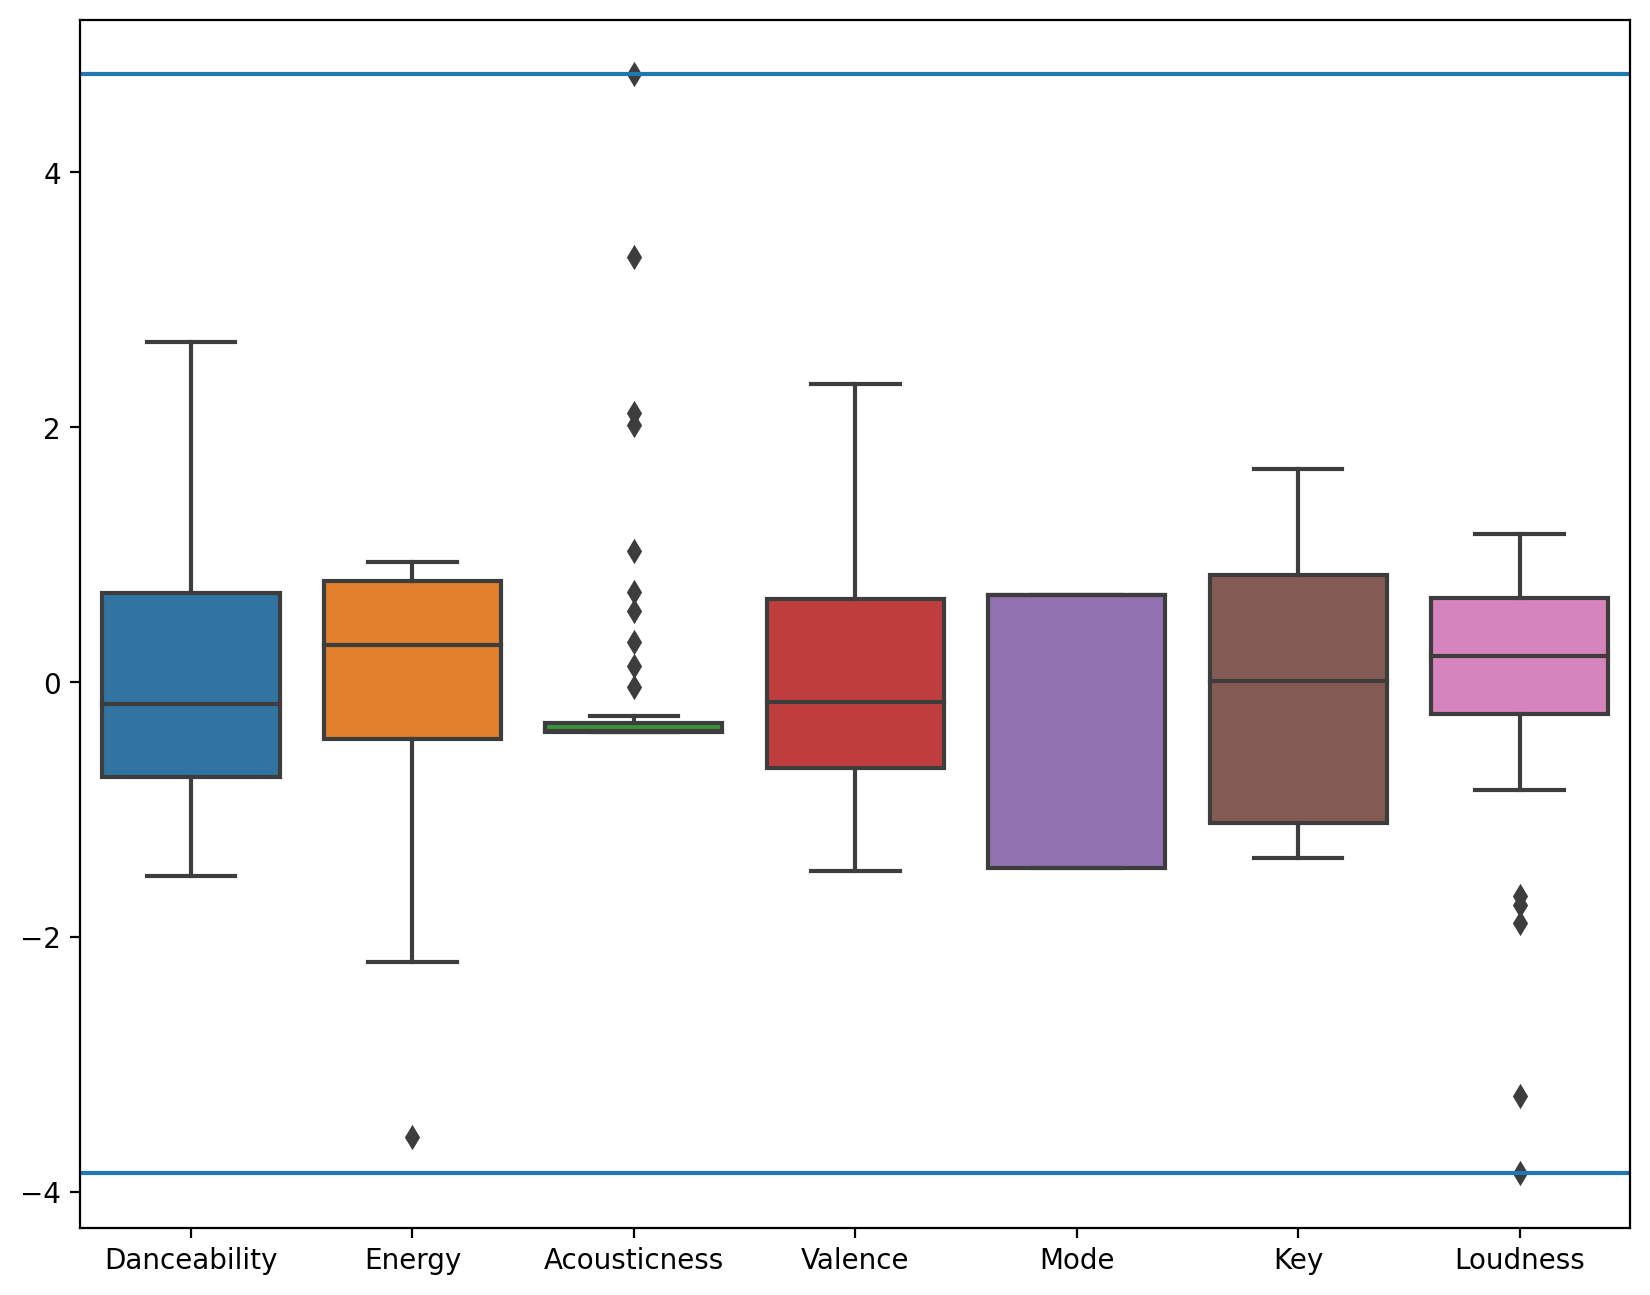

In [793]:
plt.figure(figsize=(10, 8), dpi=200)

d = {attributes.columns[key]: key for key in range(0, len(attributes.columns))}

boxplots = sns.boxplot(data=norm_df)
boxplots.set_xticklabels([s.title() for s in d.keys()])

plt.axhline(y=norm_df[d["acousticness"]].values.max())
plt.axhline(y=norm_df[d["loudness"]].values.min())


plt.show()

In [796]:
from top_tracks import sp

In [797]:
# for entry in range(0, len(tracks)):
#     track = tracks.iloc[entry]
#     analysis = sp.audio_analysis(track["uri"])
    
#     print(analysis)

In [873]:
attributes.sort_values(by="danceability", ascending=False).head()

,danceability,energy,acousticness,valence,mode,key,loudness,name
46,0.928,0.517,0.06790,0.616,1,1,-6.489,The Hop
23,0.829,0.527,0.48200,0.475,0,6,-6.644,Kevin’s Heart
49,0.822,0.479,0.71900,0.720,1,11,-15.962,Jazz (We've Got)
0,0.723,0.745,0.01000,0.478,0,8,-4.584,Bloques
33,0.719,0.996,0.00342,0.140,1,1,-2.757,Keyboard
